# Градиентный бустинг своими руками

**Внимание:** в тексте задания произошли изменения - поменялось число деревьев (теперь 50), правило изменения величины шага в задании 3 и добавился параметр `random_state` у решающего дерева. Правильные ответы не поменялись, но теперь их проще получить. Также исправлена опечатка в функции `gbm_predict`.

В этом задании будет использоваться датасет `boston` из `sklearn.datasets`. Оставьте последние 25% объектов для контроля качества, разделив `X` и `y` на `X_train`, `y_train` и `X_test`, `y_test`.

Целью задания будет реализовать простой вариант градиентного бустинга над регрессионными деревьями для случая квадратичной функции потерь.

In [1]:
from sklearn.datasets import load_boston
import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
boston=load_boston()

In [3]:
X=boston.data
y=boston.target

In [4]:
X_train=X[:380,:]
y_train=y[:380]
#train_test_split не подойдет, т.к. надо взять последние данные как отложенную выборку

In [5]:
X_test=X[380:,:]
y_test=y[380:]

## Задание 1

Как вы уже знаете из лекций, **бустинг** - это метод построения композиций базовых алгоритмов с помощью последовательного добавления к текущей композиции нового алгоритма с некоторым коэффициентом. 

Градиентный бустинг обучает каждый новый алгоритм так, чтобы он приближал антиградиент ошибки по ответам композиции на обучающей выборке. Аналогично минимизации функций методом градиентного спуска, в градиентном бустинге мы подправляем композицию, изменяя алгоритм в направлении антиградиента ошибки.

Воспользуйтесь формулой из лекций, задающей ответы на обучающей выборке, на которые нужно обучать новый алгоритм (фактически это лишь чуть более подробно расписанный градиент от ошибки), и получите частный ее случай, если функция потерь `L` - квадрат отклонения ответа композиции `a(x)` от правильного ответа `y` на данном `x`.

Если вы давно не считали производную самостоятельно, вам поможет таблица производных элементарных функций (которую несложно найти в интернете) и правило дифференцирования сложной функции. После дифференцирования квадрата у вас возникнет множитель 2 — т.к. нам все равно предстоит выбирать коэффициент, с которым будет добавлен новый базовый алгоритм, проигноируйте этот множитель при дальнейшем построении алгоритма.

## Задание 2

Заведите массив для объектов `DecisionTreeRegressor` (будем их использовать в качестве базовых алгоритмов) и для вещественных чисел (это будут коэффициенты перед базовыми алгоритмами). 

В цикле от обучите последовательно 50 решающих деревьев с параметрами `max_depth=5` и `random_state=42` (остальные параметры - по умолчанию). В бустинге зачастую используются сотни и тысячи деревьев, но мы ограничимся 50, чтобы алгоритм работал быстрее, и его было проще отлаживать (т.к. цель задания разобраться, как работает метод). Каждое дерево должно обучаться на одном и том же множестве объектов, но ответы, которые учится прогнозировать дерево, будут меняться в соответствие с полученным в задании 1 правилом. 

Попробуйте для начала всегда брать коэффициент равным 0.9. Обычно оправдано выбирать коэффициент значительно меньшим - порядка 0.05 или 0.1, но т.к. в нашем учебном примере на стандартном датасете будет всего 50 деревьев, возьмем для начала шаг побольше.

В процессе реализации обучения вам потребуется функция, которая будет вычислять прогноз построенной на данный момент композиции деревьев на выборке `X`:

```
def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(base_algorithms_list, coefficients_list)]) for x in X]
(считаем, что base_algorithms_list - список с базовыми алгоритмами, coefficients_list - список с коэффициентами перед алгоритмами)
```

Эта же функция поможет вам получить прогноз на контрольной выборке и оценить качество работы вашего алгоритма с помощью `mean_squared_error` в `sklearn.metrics`. 

Возведите результат в степень 0.5, чтобы получить `RMSE`. Полученное значение `RMSE` — **ответ в пункте 2**.

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
base_algorithms_list=[]
coefficients_list=[]

def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(base_algorithms_list, coefficients_list)]) for x in X]

In [19]:
coefficients_list.append(0.9)
regressor.fit(X_train,y_train)
base_algorithms_list.append(regressor)
Y_error=y_train-gbm_predict(X_train)

# обучаем первый базовый алгоритм, у него тоже коэф 0.9
# полученный алгортим добавляем в семейство
# будем обучать следующий алгоритм под полученную ошибку

In [20]:
# a[n]=a[n-1]+mu*b[n]

In [21]:
for _ in range(1,50):
    coefficients_list.append(0.9)
    regressor=DecisionTreeRegressor(max_depth=5,random_state=42)
    regressor.fit(X_train,Y_error)
    base_algorithms_list.append(regressor)
    Y_error=y_train-gbm_predict(X_train)   

# делаем тоже самое с еще 49 деревьями
# оишбкой будет y_train - сумма ответов базовых алгоритмов помноженная на коэф 0.9 

In [26]:
pred=np.sqrt(mean_squared_error(y_test,gbm_predict(X_test)))
pred

# считаем rmse

5.455472074527531

In [24]:
def write_answer_2(x):
    with open("grad_boosting_answer2.txt", "w") as fout:
        fout.write(str(x))
write_answer_2(pred)

## Задание 3

Вас может также беспокоить, что двигаясь с постоянным шагом, вблизи минимума ошибки ответы на обучающей выборке меняются слишком резко, перескакивая через минимум. 

Попробуйте уменьшать вес перед каждым алгоритмом с каждой следующей итерацией по формуле `0.9 / (1.0 + i)`, где `i` - номер итерации (от 0 до 49). Используйте качество работы алгоритма как **ответ в пункте 3**. 

**В реальности часто применяется следующая стратегия выбора шага: как только выбран алгоритм, подберем коэффициент перед ним численным методом оптимизации таким образом, чтобы отклонение от правильных ответов было минимальным**. Мы не будем предлагать вам реализовать это для выполнения задания, но рекомендуем попробовать разобраться с такой стратегией и реализовать ее при случае для себя.

In [27]:
base_algorithms_list=[]
coefficients_list=[]

coefficients_list.append(0.9)
regressor.fit(X_train,y_train)
base_algorithms_list.append(regressor)
Y_error=y_train-gbm_predict(X_train)

for i in range(1,50):
    coefficients_list.append((0.9/(1+i)))
    regressor=DecisionTreeRegressor(max_depth=5,random_state=42)
    regressor.fit(X_train,Y_error)
    base_algorithms_list.append(regressor)
    Y_error=y_train-gbm_predict(X_train) 
    
pred_3=np.sqrt(mean_squared_error(y_test,gbm_predict(X_test)))
pred_3

# сделали тоже самое, только уменьшаем коэффицент для каждого последующего дерева.
# То есть шаг. Так как у нас градиентный спуск

5.240742584147199

In [28]:
def write_answer_3(x):
    with open("grad_boosting_answer3.txt", "w") as fout:
        fout.write(str(x))

In [29]:
write_answer_3(pred_3)

## Задание 4

Реализованный вами метод - градиентный бустинг над деревьями - очень популярен в машинном обучении. Он представлен как в самой библиотеке `sklearn`, так и в сторонней библиотеке `XGBoost`, которая имеет свой питоновский интерфейс. На практике `XGBoost` работает заметно лучше `GradientBoostingRegressor` из `sklearn`, но для этого задания вы можете использовать любую реализацию. 

Исследуйте, переобучается ли градиентный бустинг с ростом числа итераций (и подумайте, почему), а также с ростом глубины деревьев. На основе наблюдений выпишите через пробел номера правильных из приведенных ниже утверждений в порядке возрастания номера (это будет **ответ в п.4**):

    1. С увеличением числа деревьев, начиная с некоторого момента, качество работы градиентного бустинга не меняется существенно.

    2. С увеличением числа деревьев, начиная с некоторого момента, градиентный бустинг начинает переобучаться.

    3. С ростом глубины деревьев, начиная с некоторого момента, качество работы градиентного бустинга на тестовой выборке начинает ухудшаться.

    4. С ростом глубины деревьев, начиная с некоторого момента, качество работы градиентного бустинга перестает существенно изменяться

In [138]:
import xgboost as xgb
import matplotlib.pyplot as plt

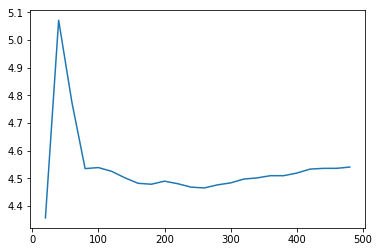

In [139]:
rmse=[]
for i in range(20,500,20):
    xgbreg=xgb.XGBRegressor(n_estimators=i)
    xgbreg.fit(X_train,y_train)
    rmse.append(np.sqrt(mean_squared_error(y_test,xgbreg.predict(X_test))))
    
plt.plot(range(20,500,20),rmse)

In [ ]:
# Видим, что ошибка начинается расти после примерно 250 деревьев
# n_estimators by default = 100

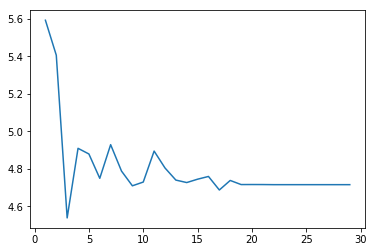

In [140]:
rmse=[]
for i in range(1,30):
    xgbreg=xgb.XGBRegressor(max_depth=i)
    xgbreg.fit(X_train,y_train)
    rmse.append(np.sqrt(mean_squared_error(y_test,xgbreg.predict(X_test))))

plt.plot(range(1,30), rmse)

In [ ]:
# Видим, что после примерно глубины равной 3, качество алгоритма ухудшается
# max_depth by default = 3

In [133]:
ans=str(2)+' '+str(3)
with open ('grad_boosting_answer4.txt','w') as fout:
    fout.write(ans)

## Задание 5

Сравните получаемое с помощью градиентного бустинга качество с качеством работы линейной регрессии. 

Для этого обучите `LinearRegression` из `sklearn.linear_model` (с параметрами по умолчанию) на обучающей выборке и оцените для прогнозов полученного алгоритма на тестовой выборке `RMSE`. Полученное качество - ответ в **пункте 5**. 

В данном примере качество работы простой модели должно было оказаться хуже, но не стоит забывать, что так бывает не всегда. В заданиях к этому курсу вы еще встретите пример обратной ситуации.

In [141]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(X_train,y_train)
np.sqrt(mean_squared_error(y_test,reg.predict(X_test)))

7.848121796479873

In [143]:
ans=str(np.sqrt(mean_squared_error(y_test,reg.predict(X_test))))
with open ('grad_boosting_answer5.txt','w') as fout:
    fout.write(ans)